# Spam Text Classification

A mmachine learning model capable of classifying messages behaviour as HAM OR SPAM. The Classifier is trained using two combined datasetwith two columns (a feature colmum "Message" and a label column "Category"). In the preprocessing I use the method word_tokenize() to split a sentence into words. The output of word tokenization can be converted to Data Frame for better text understanding in machine learning applications. while cleaning data I used SnowballStemmer to reduce the word to its base word or stem so that the words of similar kind lie under a common stem.To train the model two different learning techniques Support Vector Machine and Logic Regression applied.

## Importing Libraries

In [24]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import pickle
#from sklearn.externals import joblib

## The dataset 

In [2]:
dataset = pd.read_csv('SPAM_text_message.csv')
dataset= dataset[['Message', 'Category']]
dataset.head()

,Message,Category
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


In [3]:
new_data = pd.read_csv('new_email_data.csv')
new_data = new_data.rename(columns={'text': 'Message', 'spam': 'Category'})
new_data = new_data[['Message' , 'Category']]
new_data = new_data.dropna(axis='index')
new_data.head()

,Message,Category
0,Subject: naturally irresistible your corporate...,spam
1,Subject: the stock trading gunslinger fanny i...,spam
2,Subject: unbelievable new homes made easy im ...,spam
3,Subject: 4 color printing special request add...,spam
4,"Subject: do not have money , get software cds ...",spam


combining the two dataset in one

In [5]:
dataset = dataset.append(new_data)
dataset.tail()

,Message,Category
5725,Subject: re : research and development charges...,ham
5726,"Subject: re : receipts from visit jim , than...",ham
5727,Subject: re : enron case study update wow ! a...,ham
5728,"Subject: re : interest david , please , call...",ham
5729,Subject: news : aurora 5 . 2 update aurora ve...,ham


In [6]:
drop_index = dataset[(dataset['Category'] !='ham') & (dataset['Category'] != 'spam')].index 
dataset.drop(drop_index, inplace = True)
dataset.describe()

,Message,Category
count,17022,17022
unique,10849,2
top,"Sorry, I'll call later",ham
freq,30,13539


In [7]:
dataset.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham        13539   8840                             Sorry, I'll call later   
spam        3483   2009  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

# Data Preprocessing

## Data Analysis

checking percentage of presence of LABELS (ham, spam) using Pie plot.

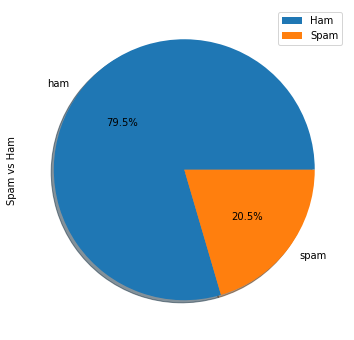

In [8]:
dataset["Category"].value_counts().plot(kind = 'pie', figsize = (6, 6), autopct = '%1.1f%%', shadow = True)
plt.ylabel("Spam vs Ham")
plt.legend(["Ham", "Spam"])
plt.show()

adding new column to the dataset 'length' with values of length of the text.

In [9]:
dataset['length'] = dataset.Message.apply(len)
dataset = dataset[['Message','length', 'Category']]
dataset.head()

,Message,length,Category
0,"Go until jurong point, crazy.. Available only ...",111,ham
1,Ok lar... Joking wif u oni...,29,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,155,spam
3,U dun say so early hor... U c already then say...,49,ham
4,"Nah I don't think he goes to usf, he lives aro...",61,ham


spam message length histogram plot 

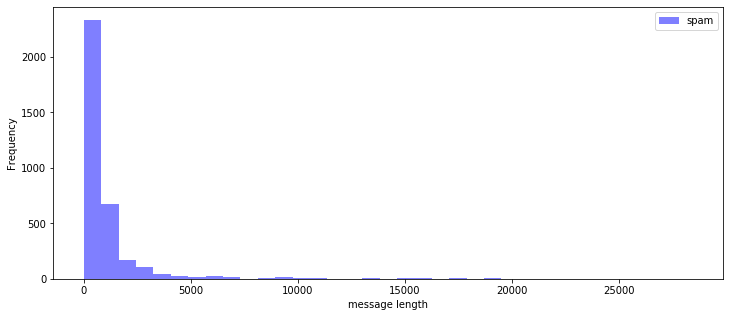

In [10]:
plt.figure(figsize=(12,5))
dataset[dataset['Category']=='spam']['length'].plot(bins=35,kind='hist',color='blue',label='spam',alpha=0.5)
plt.legend()
plt.xlabel('message length')
plt.show()

ham message lengh histogram plot

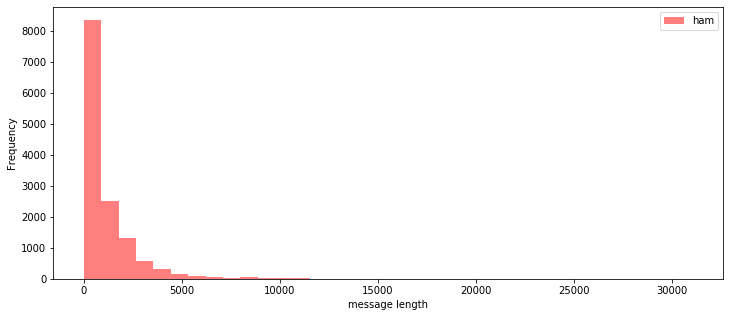

In [11]:
plt.figure(figsize=(12,5))
dataset[dataset['Category']=='ham']['length'].plot(bins=35,kind='hist',color='red',label='ham',alpha=0.5)
plt.legend()
plt.xlabel('message length')
plt.show()

checking number of spms and hams in the dataset using bar plot.

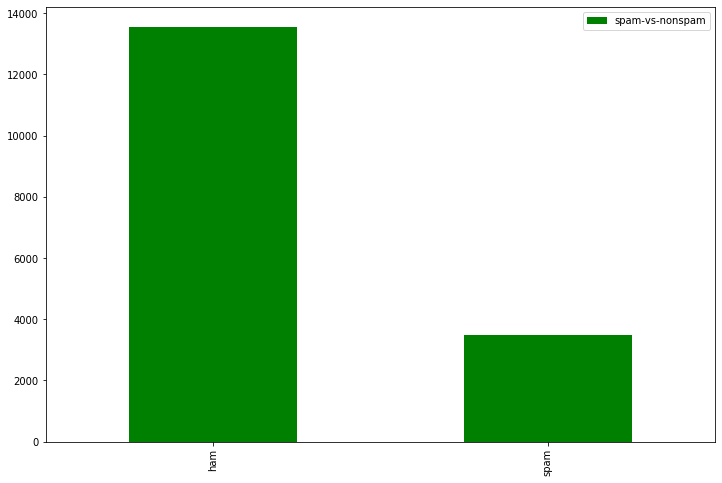

In [12]:
plt.figure(figsize=(12,8))
dataset['Category'].value_counts().plot(kind='bar',color='green',label='spam-vs-nonspam')
plt.legend()
plt.show()

## Feature Engineering

 to extract the tokens from the Message's column in every row, we use nltk method tokenize.word_tokenize(). The method return each message's syllabus in form of list. 

In [13]:
#giving dataset's category column 1 and 0 values 
dataset['Category']=np.where(dataset['Category']=='spam',1,0)

#lists that contain syllabus from spam and ham message
spam=[]
ham=[]

#datarames (spam _class, ham_class) that only have related class matched messages
spam_class=dataset[dataset['Category']==1]['Message']
ham_class=dataset[dataset['Category']==0]['Message']

def extract_ham(ham_class):
    global ham
    words = [word.lower() for word in word_tokenize(ham_class) if word.lower() not in stopwords.words("english") and word.lower().isalpha()]
    ham=ham+words
def extract_spam(spam_class):
    global spam
    words = [word.lower() for word in word_tokenize(spam_class) if word.lower() not in stopwords.words("english") and word.lower().isalpha()]
    spam=spam+words
    
spam_class.apply(extract_spam)
ham_class.apply(extract_ham )

0       None
1       None
3       None
4       None
6       None
        ... 
5725    None
5726    None
5727    None
5728    None
5729    None
Name: Message, Length: 13539, dtype: object

reducing wods in each spam/ham messages to its word stem or simply reducing word to its base word such a way that the words of similar kind lie under a common stem, eg. 'cared' will be 'care', 'stemmed' wil be 'stem' and s on.

In [15]:
#reducing wrd using nltk methd SnowballStemmer()
stemmer = SnowballStemmer("english")

def cleanText(message):
    
    message = message.translate(str.maketrans('', '', string.punctuation))
    words = [stemmer.stem(word) for word in message.split() if word.lower() not in stopwords.words("english")]
    
    return " ".join(words)

dataset["Message"] = dataset["Message"].apply(cleanText)
dataset.head(n = 10)  

,Message,length,Category
0,go jurong point crazi avail bugi n great world...,111,0
1,ok lar joke wif u oni,29,0
2,free entri 2 wkli comp win fa cup final tkts 2...,155,1
3,u dun say ear hor u c alreadi say,49,0
4,nah dont think goe usf live around though,61,0
5,freemsg hey darl 3 week word back id like fun ...,147,1
6,even brother like speak treat like aid patent,77,0
7,per request mell mell oru minnaminungint nurun...,160,0
8,winner valu network custom select receivea £90...,157,1
9,mobil 11 month u r entitl updat latest colour ...,154,1


## Data Visualization

to visualize text data we use worldcloud() technique, the size of each text indicates its frequency or importance.

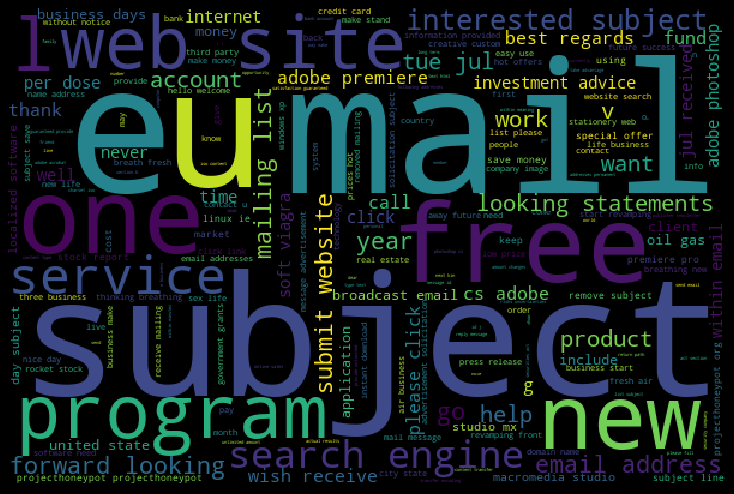

In [16]:
#wordCloud plot for spam words
spam_wordcloud = WordCloud(width=600, height=400).generate(" ".join(spam))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

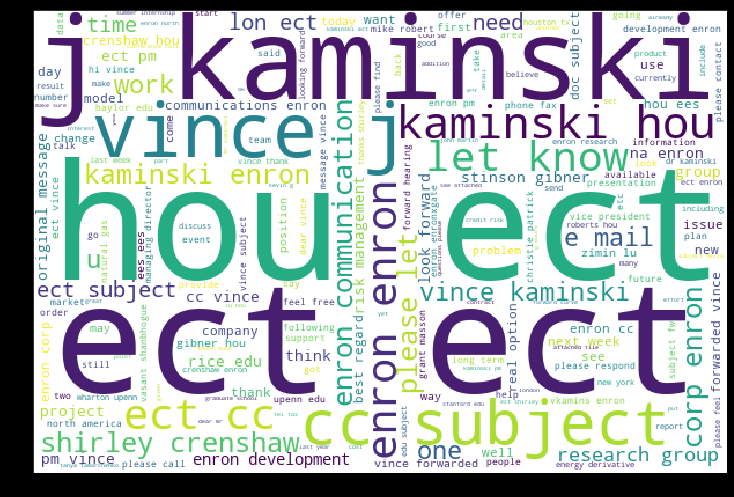

In [17]:
#wordcloud plot for ham words
ham_cloud=WordCloud(width=600,height=400,background_color='white').generate(" ".join(ham))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(ham_cloud)
plt.tight_layout(pad=0)
plt.show()

checking most occuring words in spam messages and ham messages.

In [18]:
#top 10 spam words=
spam_words=np.array(spam)
pd.Series(spam_words).value_counts().head(n=10)

subject        3149
com            1998
business       1688
company        1612
email          1610
information    1488
free           1429
e              1404
money          1328
get            1264
dtype: int64

In [19]:
#top 10 ham words
ham_words=np.array(ham)
pd.Series(ham_words).value_counts().head(n=10)

enron       26428
ect         22834
subject     17202
vince       17062
hou         11138
kaminski     9540
please       8848
com          8845
would        8239
cc           7774
dtype: int64

analyzing spam and ham messages with espect to he length of the text in each message using distribution plot.

C:\Users\abids\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\abids\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


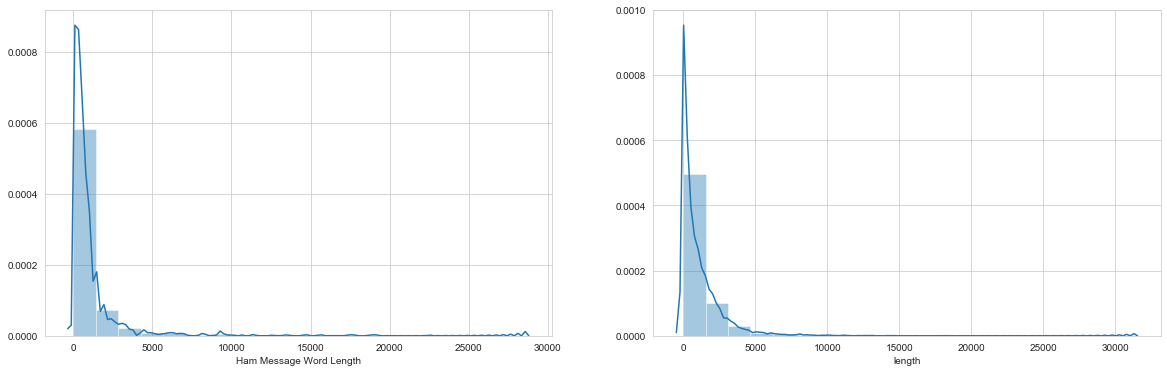

In [20]:
sns.set_style('whitegrid')

f, ax = plt.subplots(1, 2, figsize = (20, 6))

sns.distplot(dataset[dataset["Category"] == 1]["length"], bins = 20, ax = ax[0])
ax[0].set_xlabel("Spam Message Word Length")

sns.distplot(dataset[dataset["Category"] == 0]["length"], bins = 20, ax = ax[1])
ax[0].set_xlabel("Ham Message Word Length")

plt.show()

## Machine learning model training

In [21]:
#splitting dataste into 80-20 ratio for training and validation
X = dataset["Message"]
y = dataset["Category"]
features_train, features_test, labels_train, labels_test= train_test_split(X,y , random_state=0, test_size=0.2)


cv=CountVectorizer()
features_train=cv.fit_transform(features_train)

#logiticRegression model initiliazation, training an prediction on the data
Classifier = LogisticRegression(max_iter=10000)
#Classifier = SVC()
Classifier.fit(features_train, labels_train)
prediction = Classifier.predict(cv.transform(features_test))
acc = accuracy_score(labels_test, prediction)
print(acc)

0.9885462555066079


In [26]:
#saving model

pkl_filename = "spam_classifierl.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(Classifier, file)


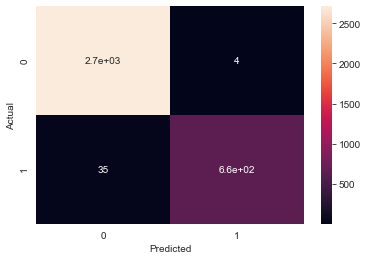

In [29]:
confusion_matrix = pd.crosstab(labels_test, prediction, rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True)
plt.show()

In [30]:
#SVC model training and prediction
Classifier2 = SVC(kernel='linear', gamma=0.001)
Classifier2.fit(features_train, labels_train)
prediction2 = Classifier2.predict(cv.transform(features_test))
acc2 = accuracy_score(labels_test, prediction2)
print(acc2)

0.9894273127753304


In [32]:
#saving model

pkl_filename = "spam_classifierl_1.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(Classifier2, file)


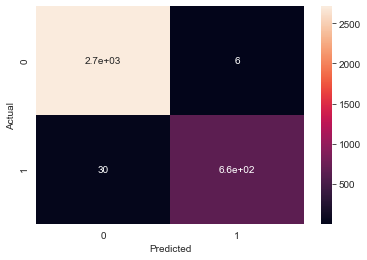

In [33]:
confusion_matrix2 = pd.crosstab(labels_test, prediction2, rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix2, annot=True)
plt.show()